In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import os, sys, time
import pandas as pd
import scipy.stats as stats
sys.path.append('../../')
import gp_regression as gp

%matplotlib inline

In [2]:
np.random.seed(3)
x = np.linspace(0,4,  num=50)
y = 2*x

scale=1
y_obs = y + stats.norm.rvs(scale=scale, size=len(x))

cov = gp.covariance_functions(1, 10)
gp_obj = gp.gaussian_process(x, x, y_obs, scale, cov)

ystar, var = gp_obj.regression()
y_hi = ystar + np.sqrt(var)*1.96
y_lo = ystar - np.sqrt(var)*1.96

In [3]:
# print(gp_obj.post_mean)
# print(gp_obj.post_cov)

In [4]:
print(gp_obj.post_mean.sum())
print(gp_obj.post_cov.sum())

184.3191275573072
49.75357132701667


In [5]:
print(np.trapz(gp_obj.post_mean, x))
L_2 = np.trapz(np.trapz(gp_obj.post_cov, x, axis=1), x)
print(L_2)

14.756937290996877
0.31983054377432496


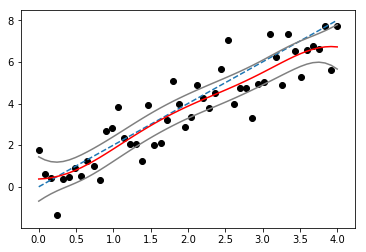

In [6]:
plt.figure()
plt.plot(x, y, '--')
plt.scatter(x, y_obs, color='black')
plt.plot(x, ystar, '-r')
plt.plot(x, y_hi, color='grey')
plt.plot(x, y_lo, color='grey')
plt.show()

In [7]:
samples = gp_obj.rvs(size=100)
int_samples = np.trapz(samples, x, axis=1)
print(int_samples.mean(), int_samples.var())

14.750677210662039 0.28129291981910626


In [8]:
# Now what happens if we also observe/know that the intergral of the data is 16
# /int_0^4 2x dx = 16

l_mu = 16
K = gp_obj.post_cov
L_k = np.trapz(gp_obj.post_cov, x, axis=1)
# L_2 = 3.76
mu_fl = L_k/L_2*l_mu
K_fl = K - np.outer(L_k,L_k.T)/L_2

gp_obj2 = gp.gaussian_process(x, x, y_obs, scale, cov)

gp_obj2.post_mean = mu_fl
gp_obj2.post_cov = K_fl

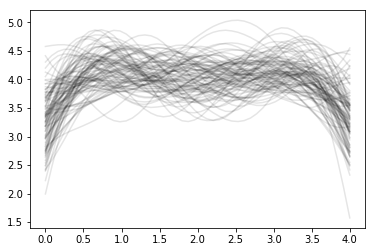

[16.00000001 16.         16.         16.         16.00000001 16.
 16.00000002 16.         15.99999999 15.99999999]


In [9]:
plt.figure()
plt.plot(x, gp_obj2.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

print(np.trapz(gp_obj2.rvs(size=10),x, axis=1))

In [10]:
# Now let's try a df/dx|x=0 = c

x2 = np.linspace(0, 4, num=10)
y2 = 2*x2
y_obs2 = y2 + stats.norm.rvs(scale=scale, size=len(x2))

cov2 = gp.covariance_functions(1, 20)
gp_obj3 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)
ystar2, var2 = gp_obj3.regression()

l_mu2 = 2
K2 = gp_obj3.post_cov
L_k2 = (gp_obj3.post_cov[1] - gp_obj3.post_cov[0])/(x2[1]-x2[0])
L_22 = (L_k2[1] - L_k2[0])/(x2[1]-x2[0])

mu2_fl = L_k2/L_22*l_mu2
K2_fl = K2 - np.outer(L_k2,L_k2.T)/(L_22)

gp_obj4 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)

gp_obj4.post_mean = mu2_fl
gp_obj4.post_cov = K2_fl

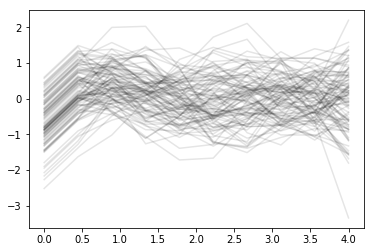

1.9999999928063683


In [11]:
plt.figure()
plt.plot(x2, gp_obj4.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample = gp_obj4.rvs()

print((sample[1]-sample[0])/(x2[1]-x2[0]))

In [12]:
cov3 = gp.covariance_functions(1, 20)
gp_obj5 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)
ystar3, var3 = gp_obj5.regression()

K3 = gp_obj5.post_cov
L_k3 = np.gradient(K3, x2, axis=0)[-1]

L_23 = np.gradient(L_k3, x2)[-1]

l_mu3 = 1
mu3_fl = L_k3/L_23*l_mu3

print(mu3_fl)

K3_fl = K3 - np.outer(L_k3,L_k3.T)/(L_23)

gp_obj6 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)

gp_obj6.post_mean = mu3_fl
gp_obj6.post_cov = K3_fl

[ 0.00497986  0.00208372 -0.01678907 -0.01032402  0.03762771  0.04491599
 -0.07714199 -0.2223217  -0.12049201  0.32395244]


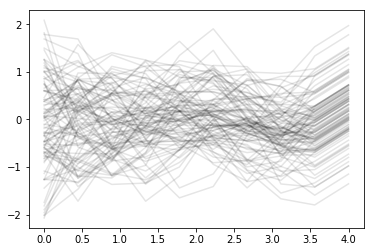

1.0000000281001753


In [13]:
plt.figure()
plt.plot(x2, gp_obj6.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample2 = gp_obj6.rvs()

print(np.gradient(sample2, x2)[-1])

In [14]:
# Now want to try d^2f/dx^2|x=0 = 0

In [15]:
x4 = np.linspace(0, 4, num=10)
y4 = 2*x4
y_obs4 = y4 + stats.norm.rvs(scale=scale, size=len(x4))

cov4 = gp.covariance_functions(1, 20)
gp_obj6 = gp.gaussian_process(x4, x4, y_obs4, scale, cov4)
ystar4, var4 = gp_obj6.regression()

K4 = gp_obj6.post_cov
L_k4 = np.gradient(np.gradient(K4, x4, axis=0), x4, axis=0)[0]

L_24 = np.gradient(np.gradient(L_k4, x4), x4)[0]

l_mu4 = 0
mu4_fl = L_k4/L_24*l_mu4
K4_fl = K4 - np.outer(L_k4,L_k4.T)/(L_24)

gp_obj7 = gp.gaussian_process(x4, x4, y_obs4, scale, cov4)

gp_obj7.post_mean = mu4_fl
gp_obj7.post_cov = K4_fl

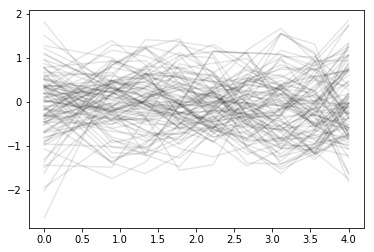

-4.7772624606201575e-09


In [16]:
plt.figure()
plt.plot(x4, gp_obj7.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample3 = gp_obj7.rvs()

print(np.gradient(np.gradient(sample3, x4), x4)[0])

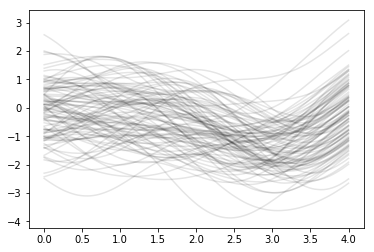

In [17]:
# Check gradient analytical kernel

x = np.linspace(0, 4, num=100)
b, tau_1, tau_2 = 1, 1, 10**-6

index = -1

K_11 = gp.covariance_functions(b, tau_1, tau_2).squared_exponential(x, x)
L_1 = gp.covariance_functions(b, tau_1, tau_2).dx1_squared_exponential(x, x)[index]
L_2 = gp.covariance_functions(b, tau_1, tau_2).dx1dx2_squared_exponential(x, x)[index][index]

slope = 2
l_mu = slope
mu_fl = L_1/L_2*l_mu

K_fl = K_11 - np.outer(L_1,L_1.T)/(L_2)

samples = stats.multivariate_normal.rvs(mean=mu_fl, cov=K_fl, size=100)

plt.figure()
plt.plot(x, samples.T, '-k', alpha=0.1)
plt.show()

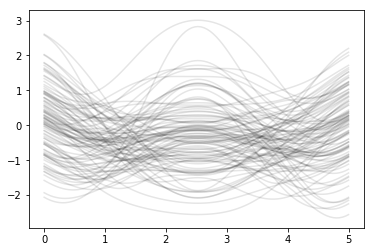

In [18]:
# Check gradient at three points with analytical

num=100
x = np.linspace(0, 5, num=num)
b, tau_1, tau_2 = 1, 1, 0

K_11 = gp.covariance_functions(b, tau_1, tau_2).squared_exponential(x, x)

ind_1 = 0
ind_2 = int(num/2)
ind_3 = -1

slope_1 = -1
slope_2 = 0
slope_3 = 1

dKdx = gp.covariance_functions(b, tau_1, tau_2).dx1_squared_exponential(x, x)

d2Kdx2 = gp.covariance_functions(b, tau_1, tau_2).dx1dx2_squared_exponential(x, x)

L_1 = dKdx[ind_1]
L_1_sq = d2Kdx2[ind_1][ind_1]

L_2 = dKdx[ind_2]
L_2_sq = d2Kdx2[ind_2][ind_2]

L_3 = dKdx[ind_3]
L_3_sq = d2Kdx2[ind_3][ind_3]

L_12 = d2Kdx2[ind_1][ind_2]
L_13 = d2Kdx2[ind_1][ind_3]

L_21 = d2Kdx2[ind_2][ind_1]
L_23 = d2Kdx2[ind_2][ind_3]

L_31 = d2Kdx2[ind_3][ind_1]
L_32 = d2Kdx2[ind_3][ind_2]

L_sq = np.array([[L_1_sq, L_12, L_13],[L_21, L_2_sq, L_23], [L_31, L_32, L_3_sq]])

K_12 = np.row_stack((L_1, L_2, L_3))
K_21 = K_12.T

l_mu = np.array([slope_1, slope_2, slope_3])

sigma_sq = 0 #10**-6

L_sq_inv = np.linalg.inv(L_sq + sigma_sq*np.eye(L_sq.shape[0]))

mu_fl = K_21 @ L_sq_inv @ l_mu
K_fl = K_11 - K_21 @ L_sq_inv @ K_12


samples = stats.multivariate_normal.rvs(mean=mu_fl, cov=K_fl, size=100)

plt.figure()
plt.plot(x, samples.T, '-k', alpha=0.1)
plt.show()

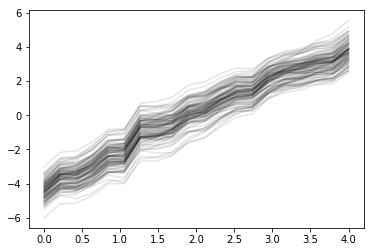

[3.74735898 1.97341612 1.22454393 2.86905089 1.89496989 3.60370978
 3.61448664 0.68106044 2.15783136 2.14983961 1.82327905 2.34815098
 1.20454482 1.99165008 2.69697109 1.26416015 1.09033314 1.01341279
 1.85827638 3.08892989]


In [43]:
# Try analytical gradient constraint everywhere

num = 20
x = np.linspace(0, 4, num=num)
b, tau_1, tau_2 = 1, 1, 0

K_11 = gp.covariance_functions(b, tau_1, tau_2).squared_exponential(x, x)

L_sq = gp.covariance_functions(b, tau_1, tau_2).dx1dx2_squared_exponential(x, x)

K_12 = gp.covariance_functions(b, tau_1, tau_2).dx1_squared_exponential(x, x)

K_21 = K_12.T

l_mu = 2*np.ones(num)

L_sq_inv = np.linalg.inv(L_sq)

mu_fl = K_21 @ L_sq_inv @ l_mu
K_fl = K_11 - K_21 @ L_sq_inv @ K_12

samples = stats.multivariate_normal.rvs(mean=mu_fl, cov=K_fl, size=100)

plt.figure()
plt.plot(x, samples.T, '-k', alpha=0.1)
plt.show()

# possible machine error propagation
print(np.gradient(samples.mean(axis=0), x))

0.5576017099680617


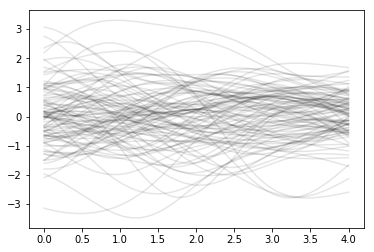

In [33]:
# Try analytical laplacian at a point

x = np.linspace(0, 4, num=200)
b, tau_1, tau_2 = 1, 1, 10**-6

index = -1

K_11 = gp.covariance_functions(b, tau_1, tau_2).squared_exponential(x, x)
L_1 = gp.covariance_functions(b, tau_1, tau_2).d_squared_x1_squared_exponential(x, x)[index]
L_2 = gp.covariance_functions(b, tau_1, tau_2).d_squared_x1_d_squared_x2_squared_exponential(x, x)[index][index]

slope = 0
l_mu = slope
mu_fl = L_1/L_2*l_mu

K_fl = K_11 - np.outer(L_1,L_1.T)/(L_2)

samples = stats.multivariate_normal.rvs(mean=mu_fl, cov=K_fl, size=100)

print(np.gradient(np.gradient(samples[0], x), x)[index])

plt.figure()
plt.plot(x, samples.T, '-k', alpha=0.1)
plt.show()

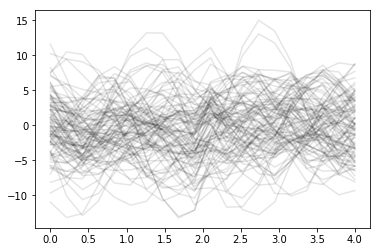

[  4.5934231   13.07784113  20.01133874   5.54240162 -10.54642735
  -6.75567035   0.5880793   -5.19587198   7.88286399  16.24454043
  -6.06422823  -4.86183931  -1.1831123   -1.74963494   1.85657152
  -5.38871799  -3.42484041  -0.50565332   1.49752015   5.01416339]


In [55]:
# Try analytical laplacian constraint everywhere

num = 20
x = np.linspace(0, 4, num=num)
b, tau_1, tau_2 = 1, 1, 0

K_11 = gp.covariance_functions(b, tau_1, tau_2).squared_exponential(x, x)

L_sq = gp.covariance_functions(b, tau_1, tau_2).d_squared_x1_squared_exponential(x, x)

K_12 = gp.covariance_functions(b, tau_1, tau_2).d_squared_x1_d_squared_x2_squared_exponential(x, x)

K_21 = K_12.T

l_mu = 1*np.ones(num)

L_sq_inv = np.linalg.inv(L_sq)

mu_fl = K_21 @ L_sq_inv @ l_mu
K_fl = K_11 - K_21 @ L_sq_inv @ K_12

samples = stats.multivariate_normal.rvs(mean=mu_fl, cov=K_fl, size=100)

plt.figure()
plt.plot(x, samples.T, '-k', alpha=0.1)
plt.show()

# possible machine error propagation
print(np.gradient(np.gradient(samples.mean(axis=0), x),x))